In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from lib import jupyter_io

%matplotlib inline

predictions = jupyter_io.read_all_predictions()
results = jupyter_io.read_results()

reading results from /home/a/code/stox/lib/../results/2020-03-07-16-52-08.csv


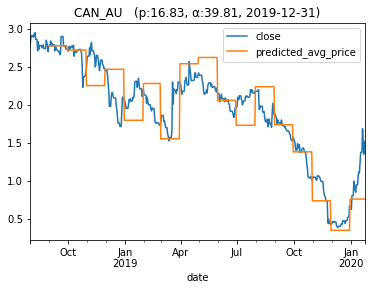

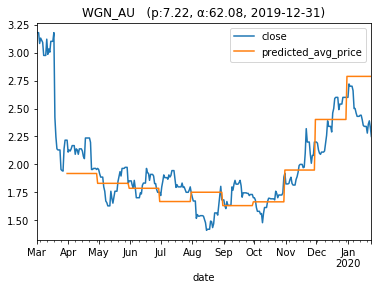

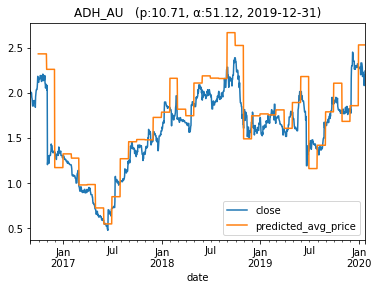

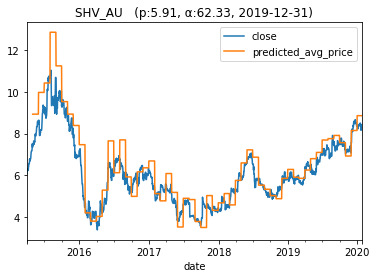

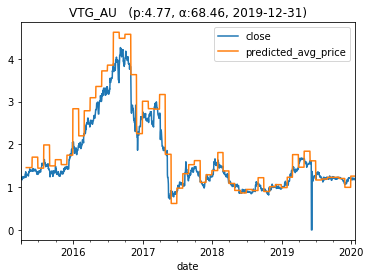

In [2]:
for ticker in results.head(5).index:
    ticker_predictions = predictions[(predictions.index.get_level_values(1)==ticker)]
    ticker_predictions.index = ticker_predictions.index.droplevel(level=1)
    from_date = ticker_predictions.index.min() - timedelta(days=31)
    
    data = jupyter_io.read_ticker_price_data(ticker, from_date) # ground truth
#     display(data)
#     last_prediction_date = results.loc[ticker, 'predicted_at']
#     last_prediction_pct  = results.loc[ticker, 'prediction']
#     data.at[last_prediction_date, 'prediction'] = last_prediction_pct
    data['predicted_avg_price'] = ((ticker_predictions['prediction'] / 100 + 1) * data['mid_price']).ffill()
    
    ax = plt.gca()
    data.plot(kind='line', y='close',ax=ax)
    data.plot(kind='line', y='predicted_avg_price',ax=ax)
    plt.title(f"{ticker}   (p:{results.loc[ticker, 'prediction']}, " + u'\u03B1:' + f"{results.loc[ticker, 'alpha']}, {ticker_predictions.tail(1).index.values[0].astype('M8[D]')})")
    plt.show()
    
    pd.set_option('display.max_rows', None)  
#     display(data)